In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

1. Upload Data

In [5]:
data = pd.read_csv('medical_examination.csv')

In [6]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
data.shape

(70000, 13)

2. Gaps management

In [9]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# If there are missing values, propose algorithms to fill them
if missing_values.any():
    missing_values = missing_values[missing_values > 0]
    missing_values
else:
    print("No missing values")

No missing values


3. Visualizations

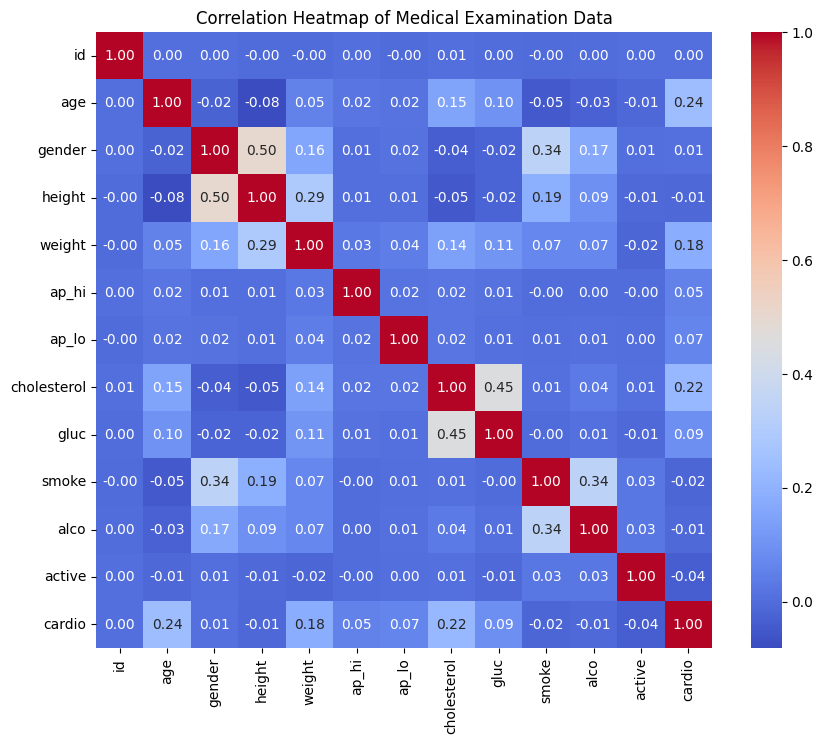

In [10]:
#Compute the correlation matrix
corr_matrix = data.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)

# Add title
plt.title('Correlation Heatmap of Medical Examination Data')
plt.show()

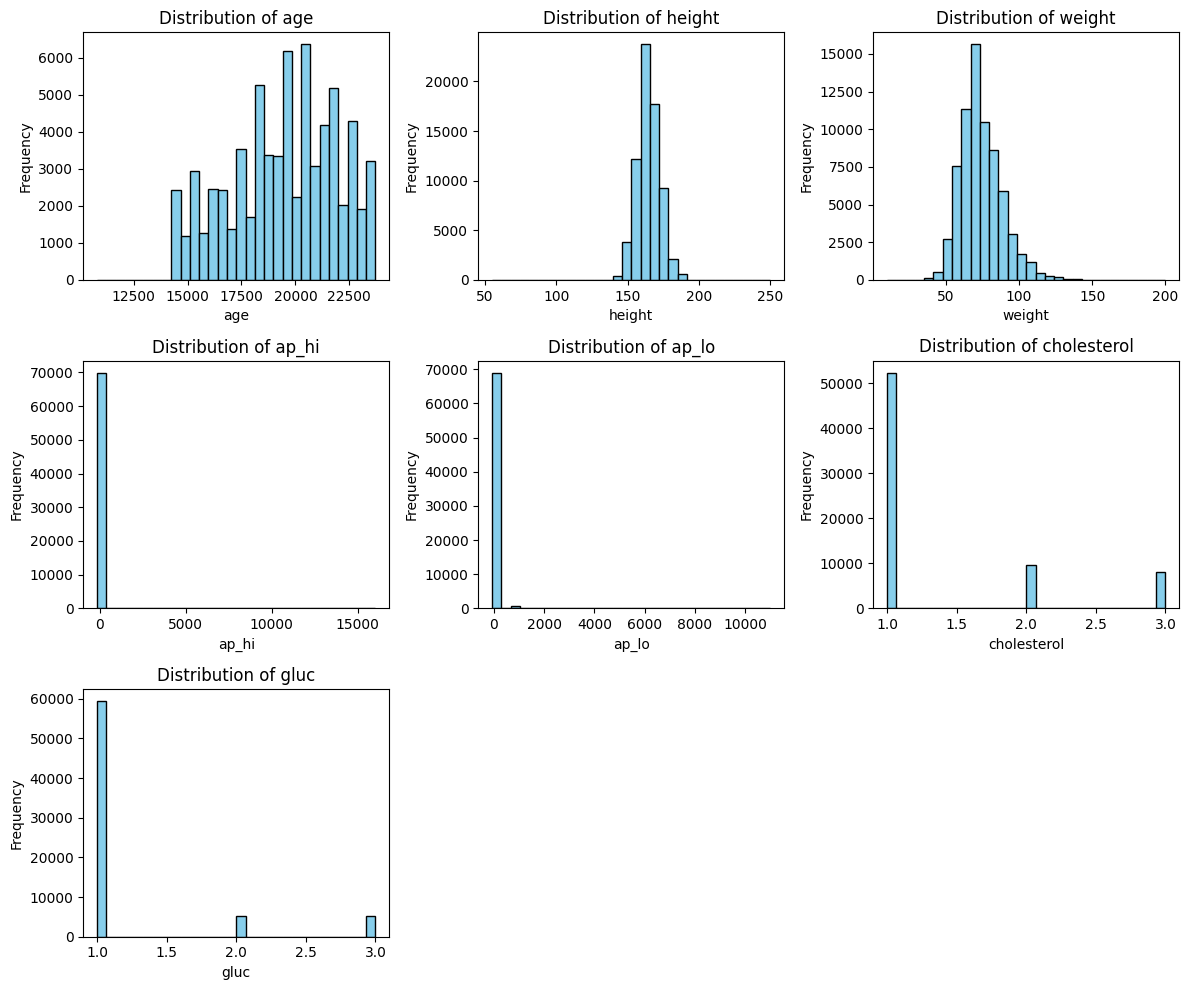

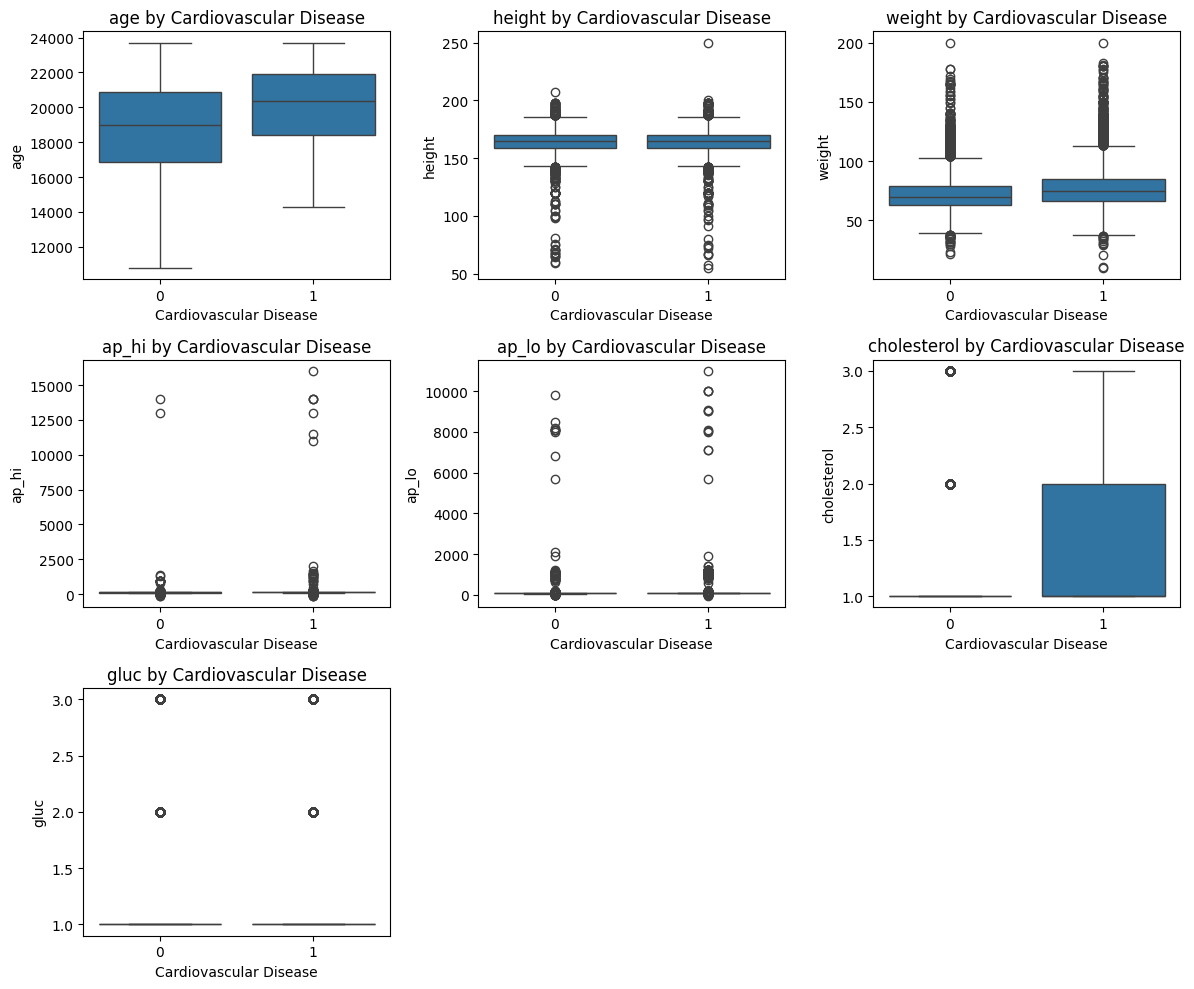

In [11]:
# Selecting a few key features for the histograms and boxplots
key_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']

# Plotting histograms for key features
plt.figure(figsize=(12, 10))
for i, feature in enumerate(key_features):
    plt.subplot(3, 3, i + 1)
    plt.hist(data[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plotting boxplots of key features relative to the target variable 'cardio'
plt.figure(figsize=(12, 10))
for i, feature in enumerate(key_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='cardio', y=feature, data=data)
    plt.title(f'{feature} by Cardiovascular Disease')
    plt.xlabel('Cardiovascular Disease')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

4. Normalization

In [12]:
features_to_normalize = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']
scaler = StandardScaler()
normalized_data = data.copy()
normalized_data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

normalized_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,-0.436062,2,0.443452,-0.847873,-0.122182,-0.088238,-0.539322,-0.39572,0,0,1,0
1,1,0.307686,1,-1.018168,0.749831,0.072610,-0.035180,2.400793,-0.39572,0,0,1,1
2,2,-0.247997,1,0.078047,-0.708942,0.007679,-0.141297,2.400793,-0.39572,0,0,0,1
3,3,-0.748152,2,0.565254,0.541435,0.137541,0.017879,-0.539322,-0.39572,0,0,1,1
4,4,-0.808543,1,-1.018168,-1.264666,-0.187113,-0.194356,-0.539322,-0.39572,0,0,0,0


In [13]:
# Display summary statistics for the normalized data
summary_statistics = normalized_data[features_to_normalize].describe()

summary_statistics

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc
count,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04
mean,5.272227e-16,1.450116e-15,-2.905105e-16,7.623108e-17,1.745905e-17,1.381498e-16,-1.327700e-16
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-3.514407e+00,-1.332014e+01,-4.460075e+00,-1.810381e+00,-8.841161e-01,-5.393221e-01,-3.957199e-01
25%,-7.315341e-01,-6.527630e-01,-6.394770e-01,-5.725127e-02,-8.823850e-02,-5.393221e-01,-3.957199e-01
50%,9.489744e-02,7.804703e-02,-1.532192e-01,-5.725127e-02,-8.823850e-02,-5.393221e-01,-3.957199e-01
75%,7.531244e-01,6.870554e-01,5.414349e-01,7.261016e-02,-3.517999e-02,9.307354e-01,-3.957199e-01
max,1.720199e+00,1.043119e+01,8.738353e+00,1.031826e+02,5.785165e+01,2.400793e+00,3.099157e+00


5. Models

In [14]:
# Splitting the data into training and testing sets
X = normalized_data.drop(columns=['cardio', 'id', 'gender', 'smoke', 'alco', 'active'])
y = normalized_data['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

5.1 k-Nearest Neighbors (kNN)

In [15]:
knn_params = {'n_neighbors': [3, 5, 7]}  # Reduced k values
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)
predict = knn_grid.predict(X_test)

In [18]:
#evaluation
print(confusion_matrix(y_test,predict))

[[7270 3191]
 [3689 6850]]


In [19]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.66      0.69      0.68     10461
           1       0.68      0.65      0.67     10539

    accuracy                           0.67     21000
   macro avg       0.67      0.67      0.67     21000
weighted avg       0.67      0.67      0.67     21000



In [20]:
print(accuracy_score(y_test,predict))

0.6723809523809524


In [17]:
#Choosing K-value
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

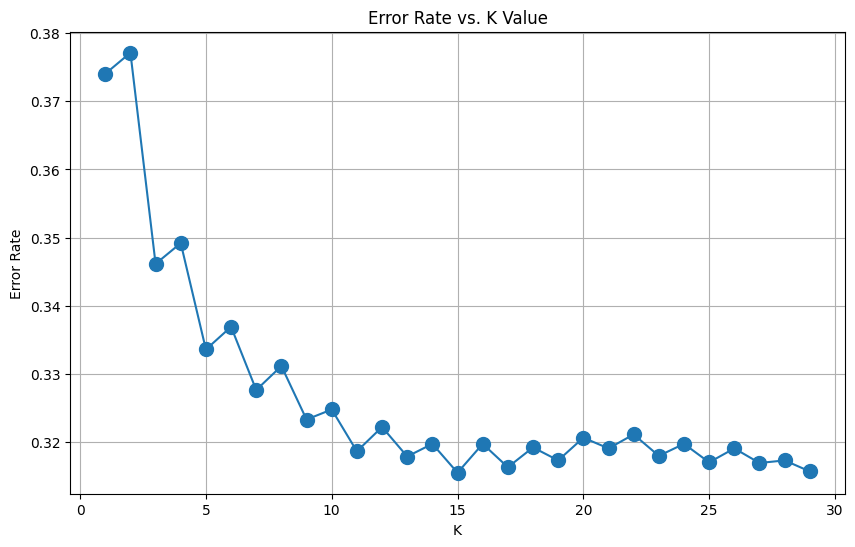

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [23]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [24]:
print(confusion_matrix(y_test,pred))

[[7506 2955]
 [3670 6869]]


In [25]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69     10461
           1       0.70      0.65      0.67     10539

    accuracy                           0.68     21000
   macro avg       0.69      0.68      0.68     21000
weighted avg       0.69      0.68      0.68     21000



5.2 Decision Tree

In [35]:
decision_tree = DecisionTreeClassifier(criterion='gini')
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)

In [36]:
#model evaluation
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.63      0.62      0.62     10461
           1       0.63      0.64      0.63     10539

    accuracy                           0.63     21000
   macro avg       0.63      0.63      0.63     21000
weighted avg       0.63      0.63      0.63     21000



In [37]:
print(confusion_matrix(y_test, dt_pred))

[[6474 3987]
 [3824 6715]]


3. SVM

In [80]:
model = SVC(C=1.0, gamma = 1.0, kernel = 'sigmoid')
model.fit(X_train,y_train)

SVC(gamma=1.0, kernel='sigmoid')

In [81]:
svm_pred = model.predict(X_test)

In [82]:
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

[[5824 4637]
 [4646 5893]]
              precision    recall  f1-score   support

           0       0.56      0.56      0.56     10461
           1       0.56      0.56      0.56     10539

    accuracy                           0.56     21000
   macro avg       0.56      0.56      0.56     21000
weighted avg       0.56      0.56      0.56     21000



SVM works badly for this data set. First of all time for prediction almost the same with the time process of training.If we change the kernel type time decrises but the accuracy as well. 

The possible reasons:
Overlapping Classes, High-dimensional Data with Noise, Large Dataset, Small Margin or Non-Separable Data


4. Random Forest

In [44]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

In [46]:
rf_pred = random_forest.predict(X_test)

In [47]:
print(confusion_matrix(y_test, rf_pred))

[[7502 2959]
 [3152 7387]]


In [48]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71     10461
           1       0.71      0.70      0.71     10539

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000



5.5 AdaBoost

In [50]:
adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(X_train, y_train)

c:\Users\OlesiaBrusentseva\PyProjects\proj1\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [52]:
ada_pred = adaboost.predict(X_test)

In [53]:
print(confusion_matrix(y_test, ada_pred))

[[8396 2065]
 [3526 7013]]


In [54]:
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75     10461
           1       0.77      0.67      0.71     10539

    accuracy                           0.73     21000
   macro avg       0.74      0.73      0.73     21000
weighted avg       0.74      0.73      0.73     21000



Find the best model

In [73]:
# Now let's evaluate the models and choose the best one based on test data
models = {
    'kNN': knn_grid.best_estimator_,
    'Decision Tree': decision_tree,
    'SVM': model,
    'Random Forest': random_forest,
    'AdaBoost': adaboost
}


In [74]:
# Evaluate models on the test set and store their results
results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    results[model_name] = {
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }


In [75]:
# Selecting the best model based on accuracy in the classification report
best_model_name = max(results, key=lambda x: results[x]['classification_report']['accuracy'])

In [76]:
# Display the classification report and confusion matrix for the best model
best_model_report = classification_report(y_test, models[best_model_name].predict(X_test))
best_model_confusion = confusion_matrix(y_test, models[best_model_name].predict(X_test))

In [77]:
best_model_name

'AdaBoost'

In [78]:
best_model_report

'              precision    recall  f1-score   support\n\n           0       0.70      0.80      0.75     10461\n           1       0.77      0.67      0.71     10539\n\n    accuracy                           0.73     21000\n   macro avg       0.74      0.73      0.73     21000\nweighted avg       0.74      0.73      0.73     21000\n'

In [79]:
best_model_confusion

array([[8396, 2065],
       [3526, 7013]])